In [1]:
import matplotlib.dates as mdates
import datetime
from tqdm import tqdm
from path import Path
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
#import plotly.graph_objs as go
import plotly.graph_objects as go
cf.go_offline()
cf.set_config_file(offline = True)
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the trading_signals.csv file into a Pandas DataFrame
# Set the date column as the DateTimeIndex
data_path = Path("bitcoin_2010-8-16_2021-10-6.csv")
df = pd.read_csv(
    data_path,
    index_col="Date",
    infer_datetime_format=True,
    parse_dates=True
)

In [4]:
#FV
df.sort_values(by=['Date'], inplace=True, ascending=True)

In [5]:
#FV
# Review the DataFrame
df.tail(10)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2021-09-27,43204.96,44237.91,42262.02,42278.31,51031440798,819023980137
2021-09-28,42111.84,42732.02,40909.31,40909.31,51750097181,789471244170
2021-09-29,41004.60,42564.99,40902.25,41543.64,50405842858,787462238462
2021-09-30,41536.59,44032.29,41466.71,43797.59,54175087118,814537665340
2021-10-01,43767.70,48388.04,43346.02,48080.37,63060539364,866976038909
2021-10-02,48147.57,48247.94,47467.84,47710.52,60614023324,900563548593
2021-10-03,47674.37,49163.40,47217.72,48144.15,47566767232,903971729927
2021-10-04,48186.65,49425.78,47004.99,49176.76,60738746937,906668798743
2021-10-05,49273.71,51785.32,49066.92,51545.05,68596958151,942701045366


In [6]:
# Review the DataFrame
df.tail(10)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2021-09-27,43204.96,44237.91,42262.02,42278.31,51031440798,819023980137
2021-09-28,42111.84,42732.02,40909.31,40909.31,51750097181,789471244170
2021-09-29,41004.60,42564.99,40902.25,41543.64,50405842858,787462238462
2021-09-30,41536.59,44032.29,41466.71,43797.59,54175087118,814537665340
2021-10-01,43767.70,48388.04,43346.02,48080.37,63060539364,866976038909
2021-10-02,48147.57,48247.94,47467.84,47710.52,60614023324,900563548593
2021-10-03,47674.37,49163.40,47217.72,48144.15,47566767232,903971729927
2021-10-04,48186.65,49425.78,47004.99,49176.76,60738746937,906668798743
2021-10-05,49273.71,51785.32,49066.92,51545.05,68596958151,942701045366


In [7]:


df.head()



,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2010-08-16,0.07,0.07,0.07,0.07,0,0
2010-08-17,0.07,0.07,0.07,0.07,0,0
2010-08-18,0.07,0.07,0.07,0.07,0,0
2010-08-19,0.07,0.07,0.07,0.07,0,0
2010-08-20,0.07,0.07,0.07,0.07,0,0


In [8]:
##EXPLORATORY DATA ANALYSIS

In [9]:
# Check if there is any missing values
#df.isnull().sum()
df.isnull().values.any()

False

In [10]:


df.describe()



,Open,High,Low,Close,Volume,Market Cap
count,3979.000000,3979.000000,3979.000000,3979.000000,3.979000e+03,3.979000e+03
mean,6021.571407,6194.930148,5836.781990,6035.582566,1.148943e+10,1.092203e+11
std,11664.263409,12016.305829,11281.014648,11690.986417,2.602466e+10,2.181235e+11
min,0.060000,0.060000,0.060000,0.060000,0.000000e+00,0.000000e+00
25%,125.375000,127.370000,122.105000,125.405000,0.000000e+00,1.384740e+09
50%,625.970000,638.650000,616.610000,626.430000,6.529633e+07,9.128638e+09
75%,7439.370000,7589.780000,7294.540000,7449.175000,7.199873e+09,1.308160e+11
max,63545.120000,64816.100000,62090.500000,63528.480000,2.121515e+11,1.184937e+12


In [11]:
df_close = df['Close']
#df_close = df_close.to_frame()
#df_close.columns = [signals_df(1)]

In [12]:
df_close.head()

Date
2010-08-16    0.07
2010-08-17    0.07
2010-08-18    0.07
2010-08-19    0.07
2010-08-20    0.07
Name: Close, dtype: float64

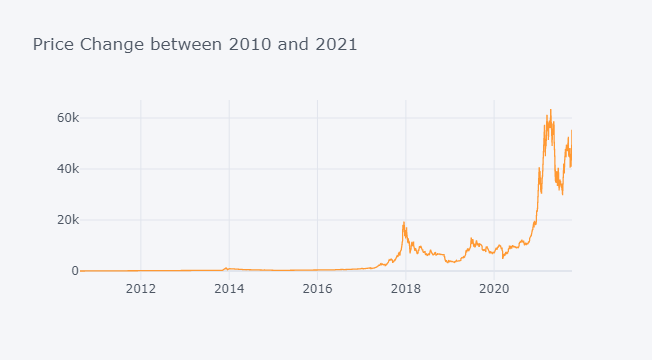

In [13]:
df_close.iplot(title = 'Price Change between 2010 and 2021')

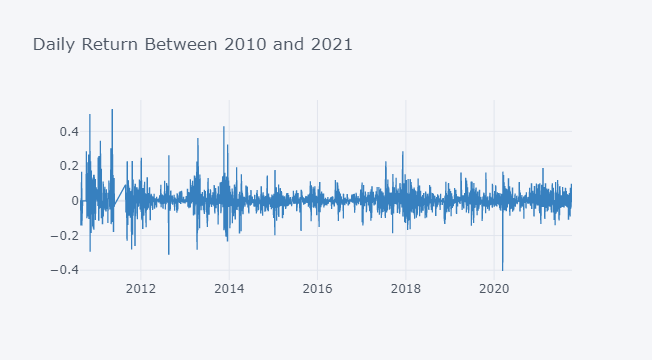

In [14]:


#Calculate daily return change
ret = df_close.pct_change()
ret.iplot(colors = 'Blue',title = 'Daily Return Between 2010 and 2021')



In [15]:
# This function is calculated annual risk and return for stocks
# def ann_risk_return(ret):
#    summary = ret.agg(["mean", "std"]).T
#    summary.columns = ["Close", "Risk"]
#    summary.Return = summary.Return*252
#     summary.Risk = summary.Risk * np.sqrt(252)
#     return summary

In [16]:
# summary = ann_risk_return(ret)
# summary

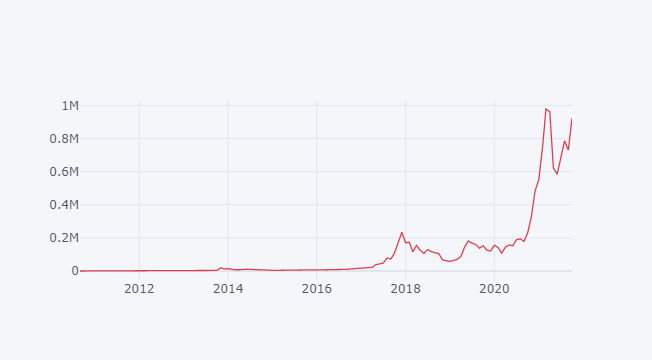

In [17]:


stocks_monthly_price = df_close.resample('M',kind='period').last()
ret_month = stocks_monthly_price.pct_change().dropna()
month_cum_ret = (1+ret_month).cumprod()
month_cum_ret.iplot(color = 'Red')



In [18]:
##Moving Average Comparison for 50,100,200 days

In [19]:


# def cal_sma50_sma100_sma200(df):
#     stocks_SMA= pd.DataFrame()
#     for stock in df.columns:
#         stocks_SMA['{}'.format(stock)] = df[stock]
#         stocks_SMA["{} SMA50".format(stock)]=df[stock].rolling(window = 50).mean()
#         stocks_SMA["{} SMA100".format(stock)]=df[stock].rolling(window = 100).mean()
#         stocks_SMA["{} SMA200".format(stock)]=df[stock].rolling(window = 200).mean()
#     return stocks_SMA

# cal_sma50_sma100_sma200(df_close)



In [20]:
# cal_sma50_sma100_sma200(df_close)

In [21]:
# moving_avg = cal_sma50_sma100_sma200(df_close)
# moving_avg.iplot(title = 'Comparison the moving averages')

In [22]:
##Annual Return Triangl

In [23]:
# annual = df_close.resample("A", kind = "period").last()
# annual

In [24]:
# annual_log_ret = np.log(annual/annual.shift())
# annual_log_ret.dropna(inplace = True)
# years = annual_log_ret.index.size

In [25]:
# def annual_return_triangle(df,annual_log_ret):
#     windows = [year for year in range(years, 0, -1)]
#     for i in df.columns:
#         for year in windows:
#             annual_log_ret["{}{}Y".format(i,year)] = annual_log_ret[i].rolling(year).mean()
#     return annual_log_ret

In [26]:
# an_ret_tri = annual_return_triangle(df_close,annual_log_ret)

In [27]:


# triangle= an_ret_tri.drop(columns = df_close.columns)
# triangle.columns



In [28]:
# triangle

In [29]:
# # def graph_annual_return_triangle(df):
# #     i=0
# #     new_list=[]
# #     while i<len(triangle.columns.values):
# #         new_list.append(df.columns.values[i:i+years])
# #         i+=years

# #     for i in new_list:
# #         plt.figure(figsize=(30,20))
#         sns.set(font_scale=2)
#         sns.heatmap(df[i], annot = True, fmt = ".1%", cmap = "RdYlGn")
#         plt.tick_params(axis = "y", labelright =True)
#     return plt.show()

In [30]:


# graph_annual_return_triangle(triangle)



In [31]:
##MACHINE LEARNING ALGORITMS
##DATA PREPERATION
##1- Normalize the Data


In [32]:
# First thing we need to do is to normalize the data with sklearn's MinMaxScaler function. We created a function for it.
# The data will be scaled between 0 - 1

def normalize_featuresDF(df):
    """
    We created to normalize df data - range between 0-1
    args:
        df : the data we pulled up from yahoo for the stock
    return:
        normalized_features_df : data after it is normalized
    
    """
    scaler = MinMaxScaler()
    feature_columns = df.columns
    feature_minmax_data = scaler.fit_transform(df)
    normalized_features_df = pd.DataFrame(columns=feature_columns, data=feature_minmax_data, index=df.index)
    
    
    return normalized_features_df

In [33]:
##2- Split the data into Train, Test and Validation sets

In [34]:
def split_ValidationSet(features_df, target_df, length=90):
    """
    method is to separate validation set from the complete df
    args:
        features_df: full features_df
        target_df :  full target_df
        length: prediction length
    returns : 
        validation_x : returns features validations sets
        validation_y : returns target validations sets
    """
    #need to shift target array because we are prediction n + 1 days price
    target_df = target_df.shift(-1)
    #split validation set . i am spliting 10% latest data for validation.
    #target
    validation_y = target_df[-length:-1]
    validation_x = features_df[-length:-1]
    
    return validation_x, validation_y

#Now get final_features_df and final_target_df by excluding validation set
def split_Final_df(normalized_features_df, target_df, v_length=90):
    """
    This method will be having remaining data after the validation set.
    args:
        features_df: normalized features_df
        target_df: complete target_df
        v_length: validation set length
    return: 
        final_features_df : set of feature df excluding validation set
        final_target_df : set of target df excluding validation set
    """
    final_features_df = normalized_features_df[:-v_length]
    final_target_df = target_df[:-v_length]
    
    return final_features_df, final_target_df

In [35]:
##3 - Train and Test split - Timeseries split

In [36]:
#Split final set into training and testing sets
#splitting training and testing set using sklearn's TimeSeries split
def split_Train_Test_DF(final_features_df, final_target_df, n_splits=10):
    """
    Using sklearn's timeseries split to split the training and testing sets
    args:
        final_features_df: features_df after splitting validation set
        final_target_df: target_df after splitting validation set
    
    return: 
        x_train : traing feature set
        y_train : training target set
        x_test : testing feature set
        y_test : testing target set
    """
    ts_split = TimeSeriesSplit(n_splits)
    for train_index, test_index in ts_split.split(final_features_df):
        x_train, x_test = final_features_df[:len(train_index)], final_features_df[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = final_target_df[:len(train_index)].values.ravel(), final_target_df[len(train_index): (len(train_index)+len(test_index))].values.ravel()
        
    return x_train, y_train, x_test, y_test

In [37]:
##4- Visualizing the datasets

In [38]:
def DataSet_Graph():
    """
    
    Chart shows 2 different sets(Train,Test,Validation) into single plot
    Since it is time series data, it shouldnot be mixed 
    """
    t=y_test.astype(np.float)
    v = target_df[-90:-1].values.ravel()
    plt.figure(figsize = (20,10))
    plt.plot(y_train, label='trainning_set')
    plt.plot([None]*len(y_train) + [x for x in t], label='test_set')
    plt.plot([None]*(len(y_train)+len(t)) + [x for x in v], label='validation_set')
    plt.xlabel('Days',fontsize = 18)
    plt.ylabel('Price',fontsize = 18)
    plt.title('Split dataset into training/validation/test set',fontsize = 20)
    plt.legend()



In [39]:
##5 - Implementing model prediction and evaluation
##Method for validating result with evaluation metrics

In [40]:
#Method to evaluate the benchmark model and solution model with validate data set
def model_validateResult(model, model_name):
    """
    Returns RMSE_Score and R2_Score
    Also plots actual vs predicted trend
    args:
        model : the model is to validate
        model_name: name of the model
    return:
        RMSE_Score : calculates rmse score
        R2_Score : calculates R2 score
    """

    model = model(x_train, y_train, validation_x)
    prediction = model.predict(validation_x)
    RMSE_Score = np.sqrt(mean_squared_error(validation_y, prediction))
    R2_Score = r2_score(validation_y, prediction)
    
    #trendline for actual vs prediction

    plt.figure(figsize = (23,10))
    plt.plot(validation_y.index, prediction, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=8,label = 'Prediction data')
    plt.plot(validation_y.index, validation_y, color='red', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=8,label = 'Actual data')
    plt.plot(figsize = (23,10))
    plt.ylabel('Price',fontsize = 20)
    plt.xlabel('Date',fontsize = 20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual',fontsize = 20)
    plt.legend(loc='upper left')
    plt.show()
    print(model_name + ' RMSE: ', RMSE_Score)
    print(model_name + ' R2 score: ', R2_Score)
    return RMSE_Score, R2_Score




#Method to evaluate the final model with testing data set
def bestModel_validateResult(model, model_name):
    """
    Returns RMSE_Score and R2_Score
    Also plots actual vs predicted trend
    args:
        model : the model is to validate
        model_name: name of the model
    return:
        RMSE_Score : calculates rmse score
        R2_Score : calculates R2 score
    """ 
    #I am giving testing set for the evaluation 
    model = model(x_train, y_train, x_test)
    prediction = model.predict(x_test)
    
    RMSE_Score = np.sqrt(mean_squared_error(y_test, prediction))
    R2_Score = r2_score(y_test, prediction)
    plt.figure(figsize = (23,10))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(model_name + 'Prediction Vs Actual',fontsize = 20)
    plt.plot(y_test, label='test data')
    plt.plot(prediction, label='prediction')
    plt.xlabel('Days',fontsize = 20)
    plt.ylabel('Price',fontsize = 20)
    plt.legend();
    print(model_name + ' RMSE: ', RMSE_Score)
    print(model_name + ' R2 score: ', R2_Score) 
    return RMSE_Score, R2_Score



def value_Compare(model):
    """
    this method is used to create final data frame using testing value with predicted value.
    args:
        model : trained model
    return : 
        df : df with test value and predicted value
    """
    model = model(x_train, y_train, x_test)
    prediction = model.predict(x_test)
    col1 = pd.DataFrame(y_test, columns=['True_value'])
    col2 = pd.DataFrame(prediction, columns = ['Predicted_value'])
    df = pd.concat([col1, col2], axis=1)
    return df



In [41]:
##6- Build Models with functions
##Decision Tree Regressor(DTR)

In [42]:
#modeling DecisionTreeRegressor with default parameters

def model_Decision_Tree_Regressor(x_train, y_train,validation_x, random_state=0):
    """
    Method is to model DecisionTreeRegressor
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
        random_state : default parameter it controls the randomness of the estimater
    
    return: 
        model : returns the trained model
        
    """
    #initialize DTR
    dtr = DecisionTreeRegressor(random_state=0)   
    #fit the data
    model = dtr.fit(x_train, y_train)
    
    return model

In [43]:
##Support Vector Regressor(SVR)

In [44]:
def model_SVR(x_train, y_train, validation_x):
    
    """
    This method uses svr algorithm to trian the data.
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    svr_model = SVR(kernel='linear')
    model = svr_model.fit(x_train, y_train)
    return model

def model_SVRTuning(x_train, y_train, validation_x):
    """
    This method uses svr algorithm to trian the data.
    Using different set of C and epsilon.
    Using GridSearchCV to select best hyperparameters
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    hyperparameters_linearSVR = {
        'C':[0.5, 1.0, 10.0, 50.0, 100.0, 120.0,150.0, 300.0, 500.0,700.0,800.0, 1000.0],
        'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
    }
    
    grid_search_SVR_feat = GridSearchCV(estimator=model_SVR(x_train, y_train, validation_x),
                           param_grid=hyperparameters_linearSVR,
                           cv=TimeSeriesSplit(n_splits=10),
    )

    model = grid_search_SVR_feat.fit(x_train, y_train)
    #print(grid_search_SVR_feat.best_params_)
    
    return model



In [45]:
##Lasso and Ridge
"""
    This method uses to train the data.
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """

'\n    This method uses to train the data.\n    args:\n        x_train : feature training set\n        y_train : target training set\n        validation_x : validation feature set\n    return:\n        model : returns the trained model\n    '

In [46]:
def model_Lasso(x_train, y_train, validation_x):
    lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
    model = lasso_clf.fit(x_train,y_train)
#   prediction = model.predict(validation_x)
    return model


def model_Ridge(x_train, y_train, validation_x):
    ridge_clf = RidgeCV(gcv_mode='auto')
    model = ridge_clf.fit(x_train,y_train)
    
#   prediction = ridge_model.predict(validation_x)
    return model

In [47]:
##Stochastic Gradient Descent (SGD)

In [48]:
def Stochastic_Gradient_Descent_model(x_train,y_train,validation_x):
    """
    This method uses to train the data.
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    
    sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
    model = sgd.fit(x_train,y_train)
#     prediction = model.predict(validation_x)
    return model

In [49]:
##7- Implimentation
##Selecting features df and target df
##Normalizing the data¶


In [50]:
#normalizing features df
normalized_features_df = normalize_featuresDF(df)
target_df = df[['Close']]

In [51]:
#Get shape of the features and target data
print("feature_df has (rows, columns) : {} ".format(normalized_features_df.shape))
print("target_df has (rows, columns) : {} ".format(target_df.shape))

feature_df has (rows, columns) : (3979, 6) 
target_df has (rows, columns) : (3979, 1) 


In [52]:
normalized_features_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2010-08-16,1.573686e-07,1.542828e-07,1.610554e-07,1.574099e-07,0.000000,0.000000
2010-08-17,1.573686e-07,1.542828e-07,1.610554e-07,1.574099e-07,0.000000,0.000000
2010-08-18,1.573686e-07,1.542828e-07,1.610554e-07,1.574099e-07,0.000000,0.000000
2010-08-19,1.573686e-07,1.542828e-07,1.610554e-07,1.574099e-07,0.000000,0.000000
2010-08-20,1.573686e-07,1.542828e-07,1.610554e-07,1.574099e-07,0.000000,0.000000
...,...,...,...,...,...,...
2021-10-02,7.576908e-01,7.443818e-01,7.644942e-01,7.510097e-01,0.285711,0.760010
2021-10-03,7.502442e-01,7.585058e-01,7.604659e-01,7.578355e-01,0.224211,0.762886
2021-10-04,7.583058e-01,7.625538e-01,7.570397e-01,7.740898e-01,0.286299,0.765162


In [53]:
target_df

,Close
Date,
2010-08-16,0.07
2010-08-17,0.07
2010-08-18,0.07
2010-08-19,0.07
2010-08-20,0.07
...,...
2021-10-02,47710.52
2021-10-03,48144.15
2021-10-04,49176.76


In [54]:
##Splitting train, test, validation sets

In [55]:
#Splitting validation sets from the final features and target df
validation_x, validation_y = split_ValidationSet(normalized_features_df, target_df)

In [56]:
print("validation_x has (rows, columns) : {} ".format(validation_x.shape))
print("validation_y has (rows, columns) : {} ".format(validation_y.shape))

validation_x has (rows, columns) : (89, 6) 
validation_y has (rows, columns) : (89, 1) 


In [57]:
#splitting train and test set from validation set

final_features_df, final_target_df = split_Final_df(normalized_features_df, target_df)

In [58]:
print("final_features_df has (rows, columns) : {} ".format(final_features_df.shape))
print("final_target_df has (rows, columns) : {} ".format(final_target_df.shape))

final_features_df has (rows, columns) : (3889, 6) 
final_target_df has (rows, columns) : (3889, 1) 


In [59]:
##Splitting Train and Test using Skleans TimeSeriesSplit

In [60]:
#splitting train and test
x_train, y_train, x_test, y_test = split_Train_Test_DF(final_features_df, final_target_df)

In [61]:
print("Shape of training sets x_train : {}, y_train : {}".format(x_train.shape, y_train.shape))
print("Shape of testing sets x_test : {}, y_test : {}".format(x_test.shape, y_test.shape))

Shape of training sets x_train : (3536, 6), y_train : (3536,)
Shape of testing sets x_test : (353, 6), y_test : (353,)


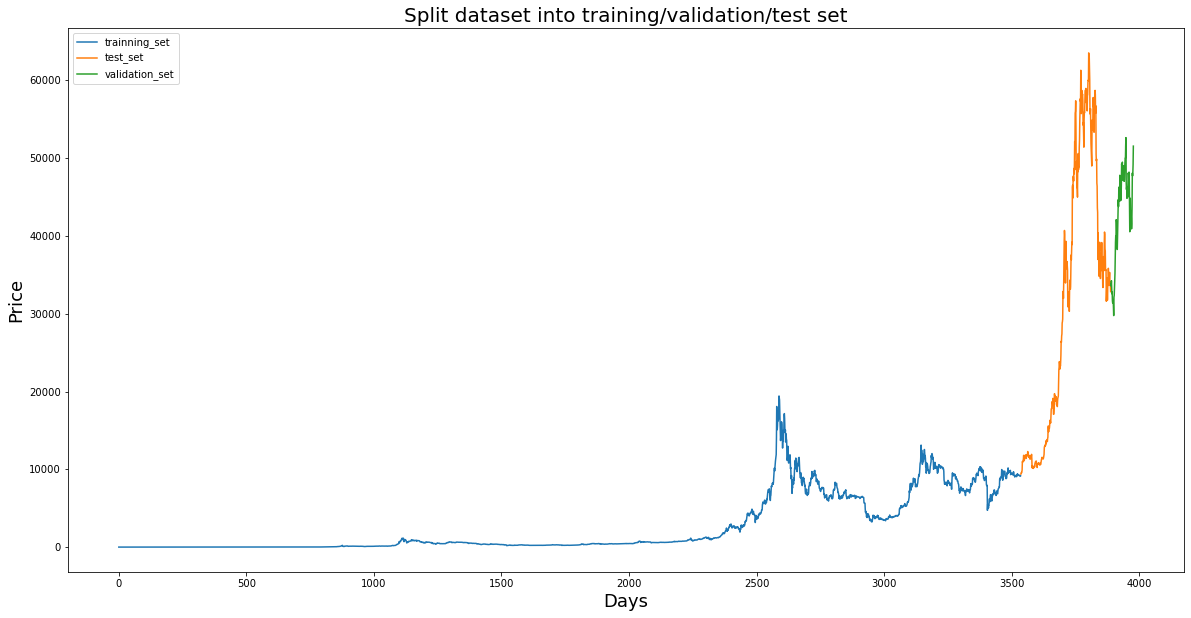

In [62]:
#Visualizing the train, test and validation sets in single plot
#Starbucks
DataSet_Graph()

### LSTM Model - Pre_work

In [64]:
# x_train and x_test were normalized already using the MinMax scaler, which is a prework requirement for LSTM
# y_train and y_test need to be scaled for the LSTM model
# y_test and y_train need to be reshaped
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)


# Fit the MinMaxScaler object with the training target data y_train
scaler = MinMaxScaler()
scaler.fit(y_train)

# Scale the target training and testing sets
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)

In [65]:
# y_train_scaled
# y_test_scaled
# x_train.tail(20)

### LSTM Model

In [403]:
# X_train Dataframe:
# Creating the Features (X_lstm) and Target (y_lstm) data
# This function accepts the column number for the features (X) and the target (y)
def window_data(lstm_data, window, feature_col_number, target_col_number):
    X_lstm_train = []
    y_lstm_train = []
    for i in range(len(lstm_data) - window):
        features = lstm_data.iloc[i:(i + window), feature_col_number]
        target = lstm_data.iloc[(i + window), target_col_number]
        X_lstm_train.append(features)
        y_lstm_train.append(target)
    return np.array(X_lstm_train), np.array(y_lstm_train).reshape(-1, 1)

In [404]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 3

feature_column = 3
target_column = 3
X_lstm_train, y_lstm_train = window_data(x_train, window_size, feature_column, target_column)

In [405]:
print (f"X_lstm_training sample values:\n{X_lstm_train[:5]} \n")
print (f"y_lstm_training sample values:\n{y_lstm_train[:5]}")

X_lstm_training sample values:
[[1.57409865e-07 1.57409865e-07 1.57409865e-07]
 [1.57409865e-07 1.57409865e-07 1.57409865e-07]
 [1.57409865e-07 1.57409865e-07 1.57409865e-07]
 [1.57409865e-07 1.57409865e-07 1.57409865e-07]
 [1.57409865e-07 1.57409865e-07 1.57409865e-07]] 

y_lstm_training sample values:
[[1.57409865e-07]
 [1.57409865e-07]
 [1.57409865e-07]
 [1.57409865e-07]
 [0.00000000e+00]]


In [406]:
# X_test Dataframe:
# Creating the Features (X_lstm) and Target (y_lstm) data
# This function accepts the column number for the features (X) and the target (y)
def window_data(lstm_data, window, feature_col_number, target_col_number):
    X_lstm_test = []
    y_lstm_test = []
    for i in range(len(lstm_data) - window):
        features = lstm_data.iloc[i:(i + window), feature_col_number]
        target = lstm_data.iloc[(i + window), target_col_number]
        X_lstm_test.append(features)
        y_lstm_test.append(target)
    return np.array(X_lstm_test), np.array(y_lstm_test).reshape(-1, 1)

In [407]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 3

feature_column = 3
target_column = 3
X_lstm_test, y_lstm_test = window_data(x_test, window_size, feature_column, target_column)

In [408]:
print (f"X_lstm_testing sample values:\n{X_lstm_test[:5]} \n")
print (f"y_lstm_testing sample values:\n{y_lstm_test[:5]}")

X_lstm_testing sample values:
[[0.14773089 0.14983593 0.15100171]
 [0.14983593 0.15100171 0.15024756]
 [0.15100171 0.15024756 0.15246814]
 [0.15024756 0.15246814 0.15610809]
 [0.15246814 0.15610809 0.17309544]] 

y_lstm_testing sample values:
[[0.15024756]
 [0.15246814]
 [0.15610809]
 [0.17309544]
 [0.17150859]]


In [409]:
# Keras needs to receive the features data as a vertical vector therefore, the X data was reshaped 
# Reshape the features for the model
X_lstm_train = X_lstm_train.reshape((X_lstm_train.shape[0], X_lstm_train.shape[1], 1))
X_lstm_test = X_lstm_test.reshape((X_lstm_test.shape[0], X_lstm_test.shape[1], 1))
print (f"X_train_lstm sample values:\n{X_lstm_train[:5]} \n")
print (f"X_test_lstm sample values:\n{X_lstm_test[:5]}")

X_train_lstm sample values:
[[[1.57409865e-07]
  [1.57409865e-07]
  [1.57409865e-07]]

 [[1.57409865e-07]
  [1.57409865e-07]
  [1.57409865e-07]]

 [[1.57409865e-07]
  [1.57409865e-07]
  [1.57409865e-07]]

 [[1.57409865e-07]
  [1.57409865e-07]
  [1.57409865e-07]]

 [[1.57409865e-07]
  [1.57409865e-07]
  [1.57409865e-07]]] 

X_test_lstm sample values:
[[[0.14773089]
  [0.14983593]
  [0.15100171]]

 [[0.14983593]
  [0.15100171]
  [0.15024756]]

 [[0.15100171]
  [0.15024756]
  [0.15246814]]

 [[0.15024756]
  [0.15246814]
  [0.15610809]]

 [[0.15246814]
  [0.15610809]
  [0.17309544]]]


In [410]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [411]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_lstm_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [412]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [413]:
# Summarize the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 3, 5)              140       
_________________________________________________________________
dropout_9 (Dropout)          (None, 3, 5)              0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 3, 5)              220       
_________________________________________________________________
dropout_10 (Dropout)         (None, 3, 5)              0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 5)                 220       
_________________________________________________________________
dropout_11 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [414]:
# Train the model
model.fit(X_lstm_train, y_lstm_train, epochs=10, shuffle=False, batch_size=10, verbose=1)

Epoch 1/10
354/354 [==============================] - 6s 6ms/step - loss: 7.8023e-04
Epoch 2/10
354/354 [==============================] - 3s 7ms/step - loss: 0.0018
Epoch 3/10
354/354 [==============================] - 3s 7ms/step - loss: 0.0020
Epoch 4/10
354/354 [==============================] - 3s 7ms/step - loss: 0.0021
Epoch 5/10
354/354 [==============================] - 3s 7ms/step - loss: 0.0020
Epoch 6/10
354/354 [==============================] - 3s 7ms/step - loss: 0.0020
Epoch 7/10
354/354 [==============================] - 3s 7ms/step - loss: 0.0016
Epoch 8/10
354/354 [==============================] - 3s 7ms/step - loss: 0.0010
Epoch 9/10
354/354 [==============================] - 3s 7ms/step - loss: 6.7569e-04
Epoch 10/10
354/354 [==============================] - 2s 6ms/step - loss: 5.4360e-04


### LSTM Model

In [415]:
# Evaluate the model
model.evaluate(X_lstm_test, y_lstm_test)

11/11 [==============================] - 1s 3ms/step - loss: 0.0514


0.05142836272716522

In [416]:
# Make some predictions
predicted_lstm = model.predict(X_lstm_test)

In [417]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted_lstm)
real_prices = scaler.inverse_transform(y_lstm_test.reshape(-1, 1))

In [418]:
# Create a DataFrame of Real and Predicted values
lstm_comparison = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = x_train.index[-len(real_prices): ])
lstm_comparison.head()

,Real,Predicted
Date,,
2019-08-06,2918.980920,2625.746582
2019-08-07,2962.121057,2647.233154
2019-08-08,3032.835775,2657.461914
2019-08-09,3362.856139,2668.208740
2019-08-10,3332.027776,2735.462158


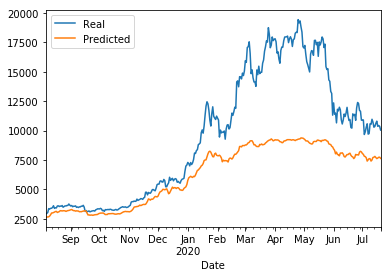

In [419]:
# Plot the real vs predicted prices as a line chart
lstm_comparison.plot()

In [63]:
##9- Model Validation

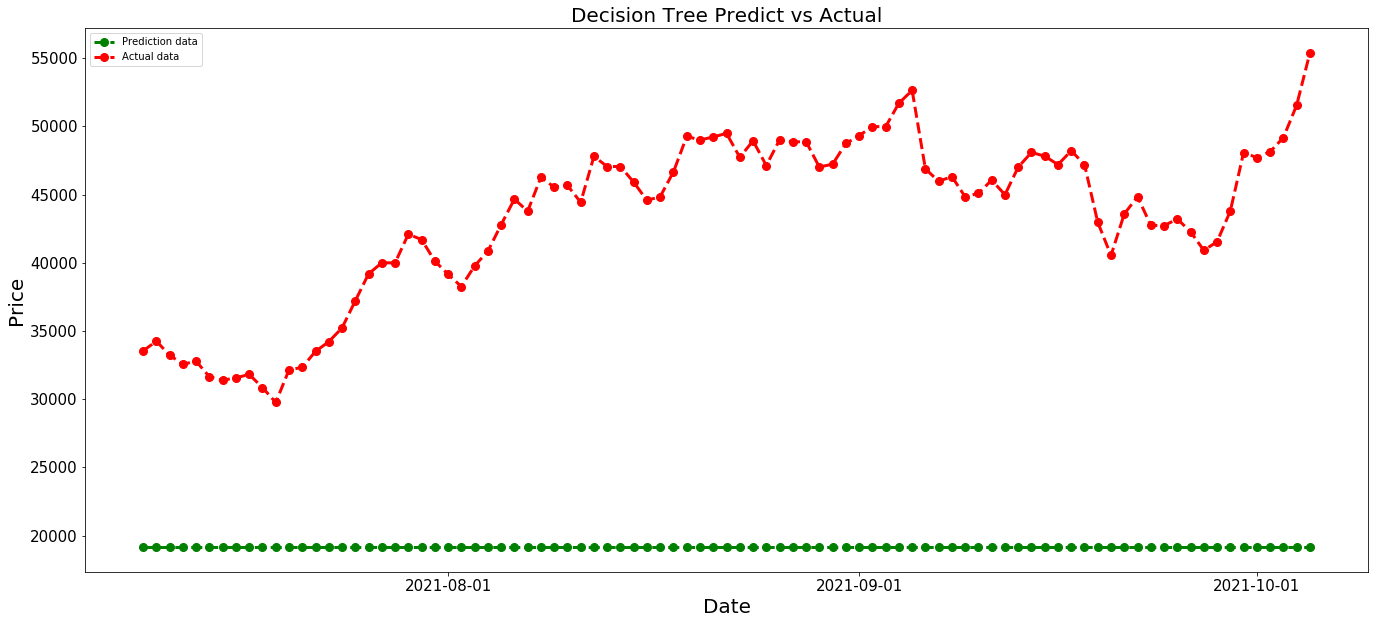

Decision Tree RMSE:  24906.750023617195
Decision Tree R2 score:  -15.936794099809806


In [64]:
# Getting the RMSE and R2 score by predicting the model.
# DTR model RMSE and R2 score with plot
RMSE_Score, R2_Score = model_validateResult(model_Decision_Tree_Regressor, model_name = "Decision Tree")

In [65]:
##Solution Model Validation
##SVR Model

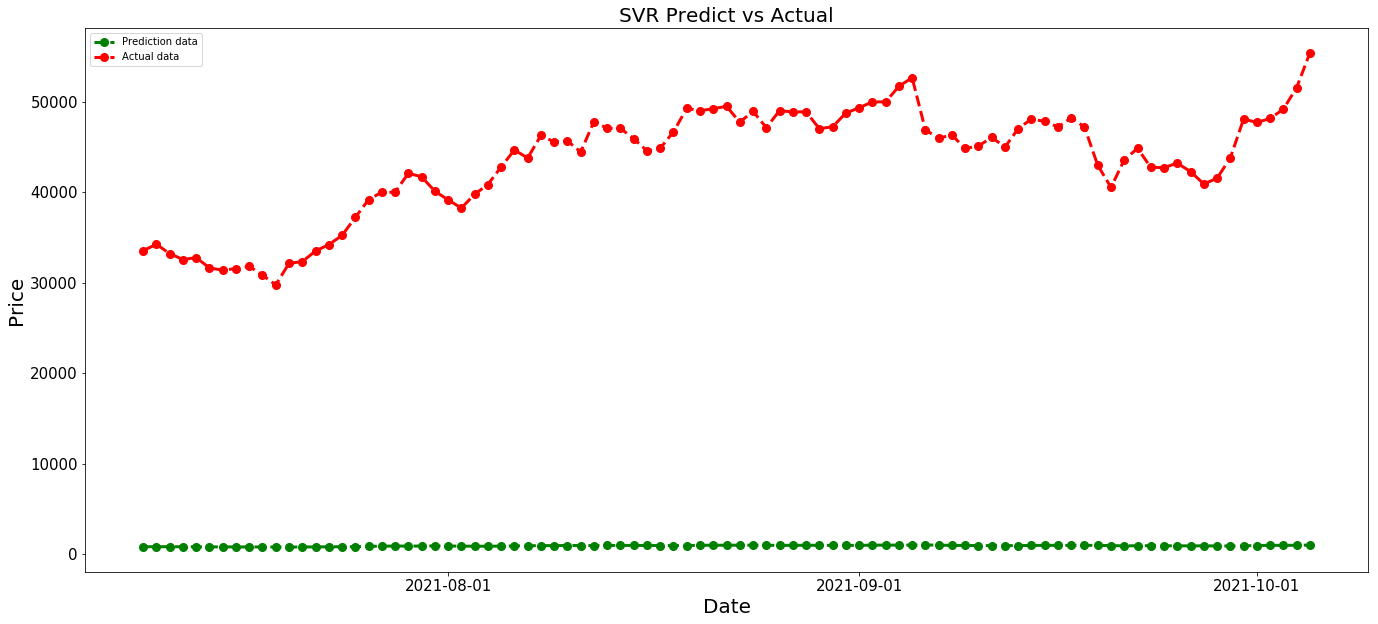

SVR RMSE:  42789.354648060165
SVR R2 score:  -48.98832178851561


In [66]:


#SVR model
RMSE_Score, R2_Score = model_validateResult(model_SVR, model_name = "SVR")



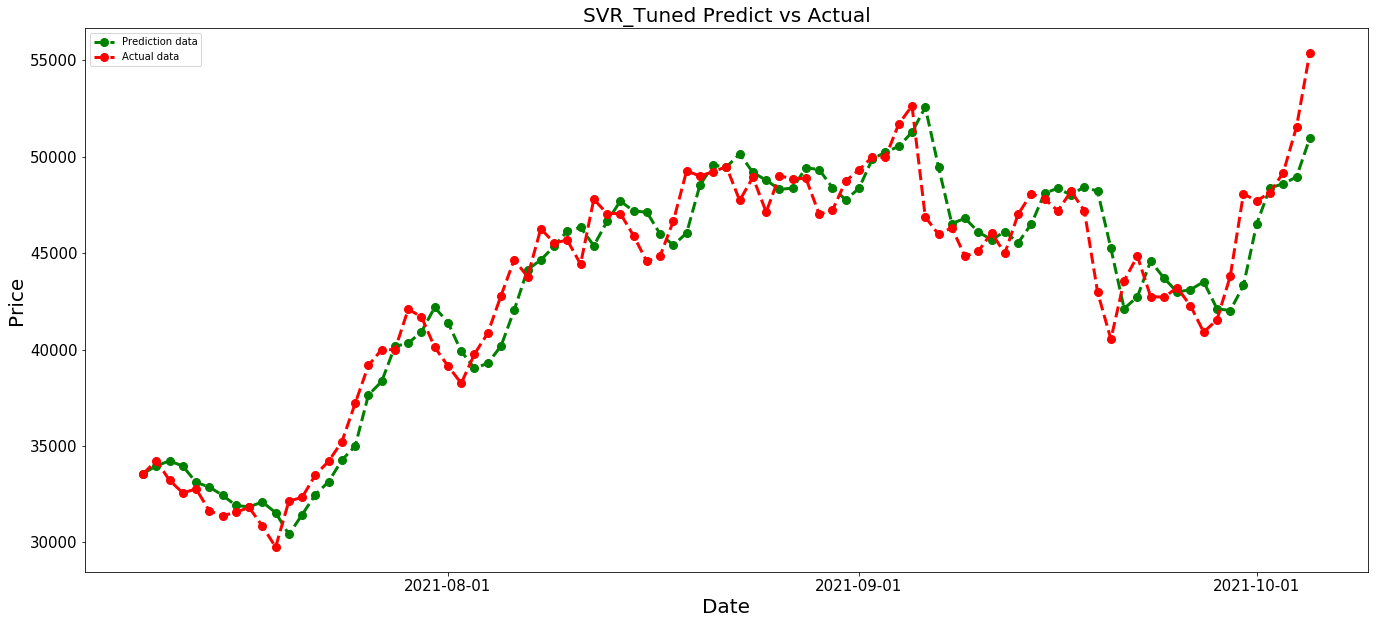

SVR_Tuned RMSE:  1827.5272339705805
SVR_Tuned R2 score:  0.908814706770251


In [67]:


#SVR model Tuning
RMSE_Score, R2_Score = model_validateResult(model_SVRTuning, model_name = "SVR_Tuned")



In [68]:
##Lasso and Ridge Model

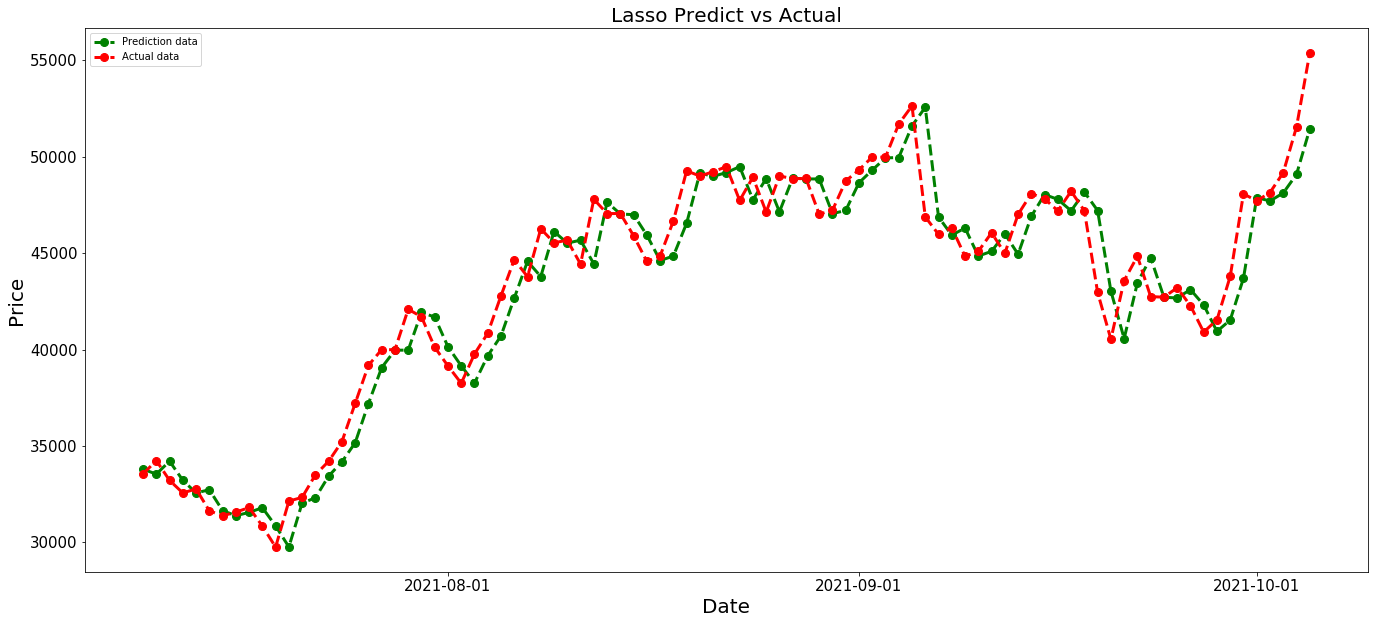

Lasso RMSE:  1625.8226703962523
Lasso R2 score:  0.9278322053639306


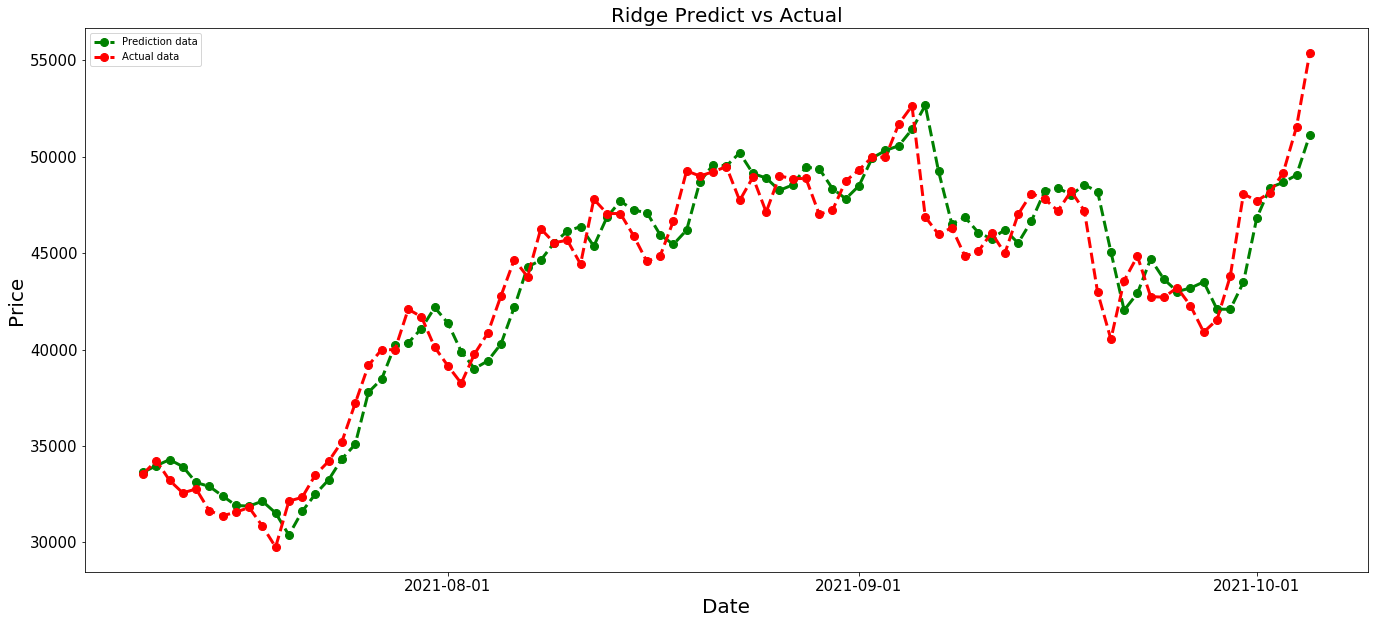

Ridge RMSE:  1792.5080992775293
Ridge R2 score:  0.912275815988284


In [69]:
RMSE_Score, R2_Score = model_validateResult(model_Lasso, model_name = "Lasso")
RMSE_Score, R2_Score = model_validateResult(model_Ridge, model_name = "Ridge")

In [70]:
##Stochastic Gradient Descent model

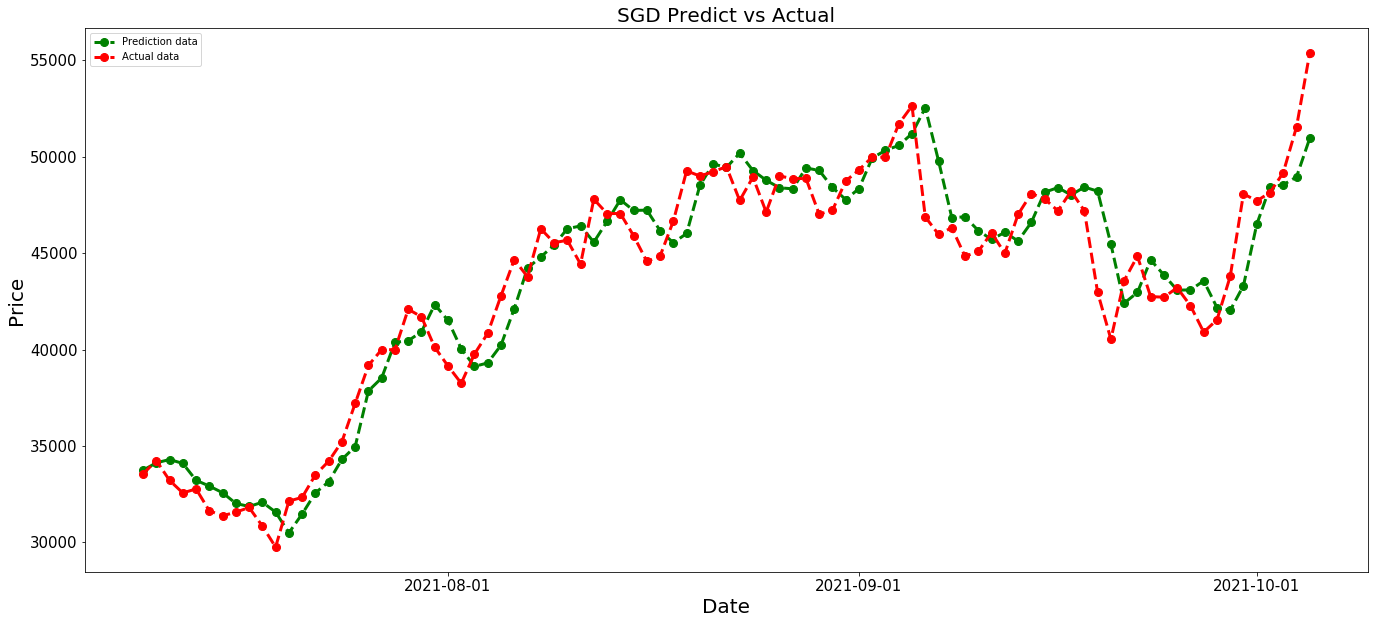

SGD RMSE:  1840.177797101209
SGD R2 score:  0.9075479263471563


In [71]:
RMSE_Score, R2_Score = model_validateResult(Stochastic_Gradient_Descent_model, model_name = "SGD")
#Stochastic_Gradient_Descent_model

In [72]:
##Which one is the Best Model?

In [73]:
def ValidationDataResult(model, model_name):
    """
    Returns RMSE_Score and R2_Score
    Also plots actual vs predicted trend
    args:
        model : it takes the model to validate
        model_name: give the model name
    return:
        RMSE_Score : calculates rmse score
        R2_Score : calculates R2 score
    """
    model = model(x_train, y_train, validation_x)
    prediction = model.predict(validation_x)
    
    RMSE_Score = np.sqrt(mean_squared_error(validation_y, prediction))
    
    R2_Score = r2_score(validation_y, prediction)
    
    model_validation = {model_name:[RMSE_Score,R2_Score]}
    return model_validation


################################################################################


#Method to evaluate the final model with testing data set
def TestDataResult(model, model_name):
    """
    Returns RMSE_Score and R2_Score
    Also plots actual vs predicted trend
    USing testing data set for evaluation
    args:
        model : it takes the model to validate
        model_name: give the model name
    return:
        RMSE_Score : calculates rmse score
        R2_Score : calculates R2 score
    """
    
    #I am giving testing set for the evaluation 
    model = model(x_train, y_train, x_test)
    prediction = model.predict(x_test)
    
    RMSE_Score = np.sqrt(mean_squared_error(y_test, prediction))
    
    R2_Score = r2_score(y_test, prediction)
    
    model_validation_test_data = {model_name:[RMSE_Score,R2_Score]}
    
    return model_validation_test_data

In [74]:
import warnings
warnings.filterwarnings('ignore')

model_list = {'Decision_Tree': model_Decision_Tree_Regressor,'SVR': model_SVR,
              'SVR_Tuning':model_SVRTuning, 'Lasso':model_Lasso,'Ridge':model_Ridge,
              'Stockhastic_Gradient':Stochastic_Gradient_Descent_model}


ValidationData_RMSE_R2_Score = []
TestData_RMSE_R2_Score = []


for key, value in model_list.items():
    all_model_val = ValidationDataResult(model = value, model_name = key)
    ValidationData_RMSE_R2_Score.append(all_model_val)
print('Validation Data Result : ',ValidationData_RMSE_R2_Score)



for key, value in model_list.items():
    all_model_val_test = TestDataResult(model = value, model_name = key)
    TestData_RMSE_R2_Score.append(all_model_val_test)
print('Test Data Result : ', TestData_RMSE_R2_Score)

Validation Data Result :  [{'Decision_Tree': [24906.750023617195, -15.936794099809806]}, {'SVR': [42789.354648060165, -48.98832178851561]}, {'SVR_Tuning': [1827.5272339705805, 0.908814706770251]}, {'Lasso': [1625.8226703962523, 0.9278322053639306]}, {'Ridge': [1792.5080992775293, 0.912275815988284]}, {'Stockhastic_Gradient': [1839.9830996630758, 0.9075674888369077]}]
Test Data Result :  [{'Decision_Tree': [20566.19342358244, -0.39266686315495636]}, {'SVR': [34681.12517499373, -2.960278867017442]}, {'SVR_Tuning': [752.8433490384613, 0.9981338409889566]}, {'Lasso': [63.97134256349472, 0.9999865255719145]}, {'Ridge': [689.1127381727556, 0.9984364205066011]}, {'Stockhastic_Gradient': [859.9212917531654, 0.9975652363194984]}]


In [75]:
RMSE_ValidationData,R2_Score_ValidationData,models_ValidationData = [],[],[]

for i in ValidationData_RMSE_R2_Score:
    for key,value in i.items():
        RMSE_ValidationData.append(value[0])
        R2_Score_ValidationData.append(value[1])
        models_ValidationData.append(key)
        


RMSE_TestData,R2_Score_TestData,models_TestData= [],[],[]

for i in TestData_RMSE_R2_Score:
    for key,value in i.items():
        RMSE_TestData.append(value[0])
        R2_Score_TestData.append(value[1])
        models_TestData.append(key)

    
    
Validation_Model_List = pd.DataFrame(np.column_stack([RMSE_ValidationData,R2_Score_ValidationData]), index = models_ValidationData,columns = ['RMSE','R2_Score'] )
Test_Model_List = pd.DataFrame(np.column_stack([RMSE_TestData,R2_Score_TestData]), index = models_TestData,columns = ['RMSE','R2_Score'] )

In [76]:
Validation_Model_List

,RMSE,R2_Score
Decision_Tree,24906.750024,-15.936794
SVR,42789.354648,-48.988322
SVR_Tuning,1827.527234,0.908815
Lasso,1625.822670,0.927832
Ridge,1792.508099,0.912276
Stockhastic_Gradient,1839.983100,0.907567


In [77]:
Test_Model_List

,RMSE,R2_Score
Decision_Tree,20566.193424,-0.392667
SVR,34681.125175,-2.960279
SVR_Tuning,752.843349,0.998134
Lasso,63.971343,0.999987
Ridge,689.112738,0.998436
Stockhastic_Gradient,859.921292,0.997565


In [78]:


# We select lowest RMSE and Highest R2_Score to select best Model.All results indicate SVR_Tuning is the best model.
print('Min RMSE for Validation DataSet : ', Validation_Model_List['RMSE'].idxmin(),'\nMax R2_Score for Validation DataSet : ',Validation_Model_List['R2_Score'].idxmax())
print('Min RMSE for Test DataSet: ',Test_Model_List['RMSE'].idxmin(),'\nMax R2_Score for Test DataSet : ',Test_Model_List['R2_Score'].idxmax())



Min RMSE for Validation DataSet :  Lasso 
Max R2_Score for Validation DataSet :  Lasso
Min RMSE for Test DataSet:  Lasso 
Max R2_Score for Test DataSet :  Lasso


In [79]:
##SVM_Tuning

SVR_Best Model  RMSE:  752.8433490384613
SVR_Best Model  R2 score:  0.9981338409889566


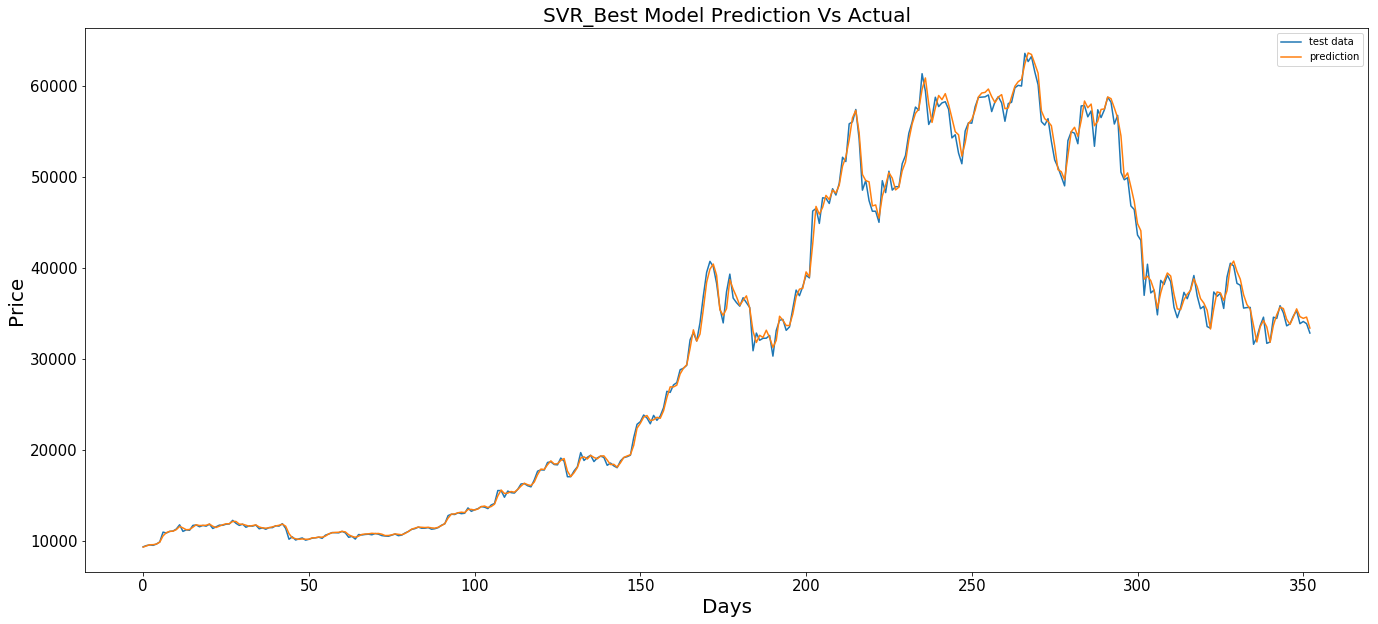

In [80]:
#Based on the RSME Scroe and R2 Score, I am selecting SVM with tuned model as best model for this. 
#Below I am going predict the value with test df

#SVR_Tuning model validation with test data
RMSE_Score, R2_Score = bestModel_validateResult(model_SVRTuning, model_name = "SVR_Best Model ")

In [81]:
#SVM_Tuned model actual vs prected value
prediction_df = value_Compare(model_SVRTuning)
display(prediction_df.tail(40))

,True_value,Predicted_value
313,35618.16,35401.132176
314,37303.75,36488.690969
315,36606.39,37110.614980
316,37622.43,37520.307617
317,39152.71,38788.497801
318,36908.14,37914.221497
319,35510.26,36622.719172
320,35781.01,36126.791939
321,33550.00,35338.505507
322,33369.14,33281.077045


In [82]:
prediction_df.iplot()